## Practical Lab 3: Linear Regression on linearly separable data

This lab demonstrate how to use linear regression to fit linearly separable data (See CSC4007 lecture 03). The implemnetation basically uses linear features. 

In [21]:
# importing numpy and linear algebra library
import numpy as np
from numpy import dot

# this is the inverse operator
from numpy.linalg import inv

# plotting import
import matplotlib.pyplot as plt
%matplotlib notebook

# 3D plotting import
from mpl_toolkits.mplot3d.axes3d import Axes3D



This function "prepend_one" compute a linear feature phi(x)=[1, x] for all data point x in X
 - The argument of "prepend_one" a full data matrix X where each row of X is one data point x in 2D
 - So X's dim is nx2 (n data points, each data point has 2 variables/dimensions)

In [12]:
def prepend_one(X):
    
    """prepend a one vector to X."""
    
    # get number of training points
    n_trains = X.shape[0]       
    # creat a column vector (dim = nx1) with values of 1s only.
    ones = np.ones(X.shape[0])
    
    # create new data matrix of linear features.
    phi_X = np.column_stack([np.ones(X.shape[0]), X])
    
    return phi_X


grid2d creates a grid of points on 2D space. 
- A grid of (num) points (x,y) evenly disctributed in a range: end<x<start; end<y<start

In [13]:
def grid2d(start, end, num=50):
    """Create an 2D array where each row is a 2D coordinate.
    np.meshgrid is pretty annoying!
    """
    dom = np.linspace(start, end, num)
    X0, X1 = np.meshgrid(dom, dom)
    return np.column_stack([X0.flatten(), X1.flatten()])


## load and inspect the data in file dataLinReg2D.txt
- the first two columns are data x; the last columns are output y
- each row is one data point (x_i,y_i)
- separate into two set: training (80%) and test (20%) data set

In [14]:
###############################################################################

data = np.loadtxt("dataLinReg2D.txt")

#inspect your data dimension
print ("data.shape:", data.shape)
np.savetxt("tmp.txt", data) # save data if you want to


n_data = data.shape[0]
n_training = int(n_data * 0.8)
train_data = data[:n_training,:]
test_data  = data[n_training:,:]


#training_data = 

# split into inputs and outputs
X, y = train_data[:, :2], train_data[:, 2]
print ("X.shape:", X.shape)
print ("y.shape:", y.shape)

X_test, y_test = test_data[:, :2], test_data[:, 2]
print ("X_test.shape:", X_test.shape)
print ("y_test.shape:", y_test.shape)

data.shape: (100, 3)
X.shape: (80, 2)
y.shape: (80,)
X_test.shape: (20, 2)
y_test.shape: (20,)


<IPython.core.display.Javascript object>


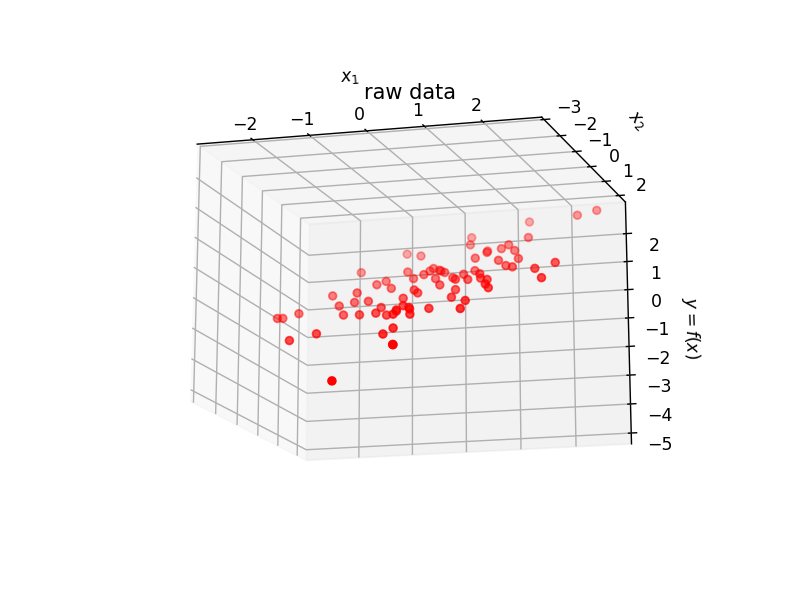

In [22]:
# 3D plotting the data: further inspect the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection arg is important!

# 
ax.scatter(X[:, 0], X[:, 1], y, color="red")
ax.set_title("raw data")
#set labels for three axis: x-axis, y-axis, z-axis
# Note: I use latex to write labels using math notations (https://matplotlib.org/users/usetex.html)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$y=f(x)$')

plt.draw()
# show, use plt.show() for blocking

## Computing the optimum parameters
- Use the rule beta = (X^T X)^-1 X^T y


In [16]:
# using linear regression: adding a bias column (with only ones) into X
# prep for linear reg.
# Construct a matrix of features phi(x)

PHI_X = prepend_one(X)
print("PHI_X.shape:", PHI_X.shape)

PHI_X.shape: (80, 3)


In [17]:
# Fit model/compute optimal parameters beta
beta_ = dot(dot(inv(dot(PHI_X.T, PHI_X)), PHI_X.T), y)
print ("Optimal beta:", beta_)



Optimal beta: [-0.67515083  0.24703315  1.36823744]


## Test the found parameters
- visualize the found plane y = beta0 + beta1  x1 + beta2  x2
- computing training and testing error


In [18]:
# preparation for prediction
X_grid = grid2d(-5, 5, num=30)
X_grid = prepend_one(X_grid)
print ("X_grid.shape:", X_grid.shape)

# Predict with trained model
y_grid = dot(X_grid, beta_)
print ("Y_grid.shape", y_grid.shape)

X_grid.shape: (900, 3)
Y_grid.shape (900,)


<IPython.core.display.Javascript object>


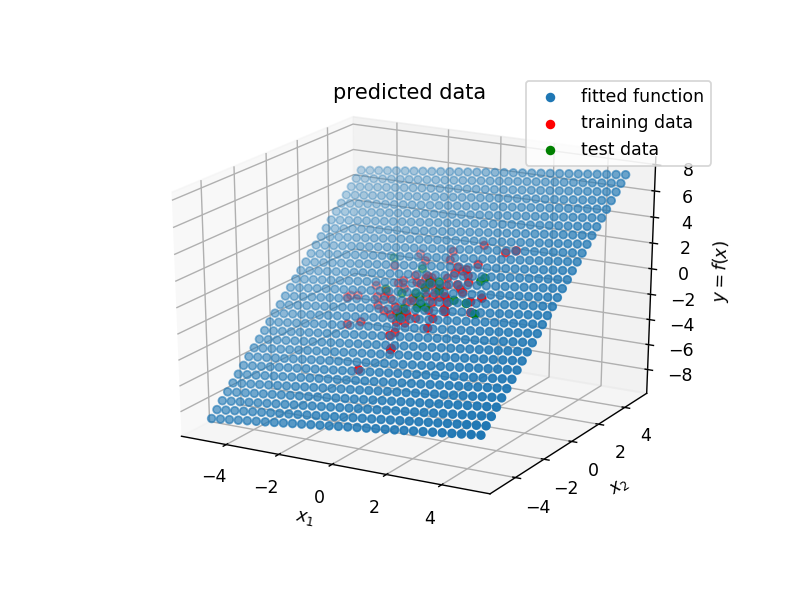

In [23]:
# visualize the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection part is important
function_plot = ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid) # don’t use the 1 infront
training_plot = ax.scatter(X[:, 0], X[:, 1], y, color="red") # also show the training data
test_plot = ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color="green") # also show the test data
ax.set_title("predicted data")
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$y=f(x)$')

ax.legend((function_plot, training_plot, test_plot), ('fitted function', 'training data', 'test data'))
plt.draw()

In [24]:
#computing training and testing error
def error_computing(PHI,beta_,ground_truth):
    y_predicted = dot(PHI,beta_)
    err =  np.linalg.norm(y_predicted - ground_truth)/len(ground_truth)
    return err
   
#Training error    
err_training = error_computing(PHI_X,beta_,y)
print("Training error is",err_training)


#computing The feature matrix for X_test
PHI_X_test = prepend_one(X_test)
#Testing error  
err_test = error_computing(PHI_X_test,beta_,y_test)
print("Testing error is",err_test)


Training error is 0.010982701005379469
Testing error is 0.025219403620237925
